Works!!


https://www.sharemarkethub.com/2020/05/09/data-science-projects/

In [1]:
import numpy as np
import pandas as pd
import math

import os
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime, timedelta

plt.style.use('fivethirtyeight')
from nsepy import get_history
from datetime import date

In [2]:
symbol = input("Enter symbol of Stock:")
start = date(2015, 1, 1)
end = date.today()
df = get_history(symbol = symbol, start = start, end = end)
df['Date'] = df.index

In [3]:
df.head(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2015-01-01,CIPLA,EQ,626.40,626.50,634.80,626.50,629.95,628.40,630.72,596787,3.764074e+13,9333,201185,0.3371,2015-01-01
2015-01-02,CIPLA,EQ,628.40,633.00,637.55,629.35,631.00,630.15,632.96,688999,4.361072e+13,11080,332082,0.4820,2015-01-02
2015-01-05,CIPLA,EQ,630.15,626.00,638.00,626.00,632.40,633.00,633.49,1282895,8.126986e+13,22739,689132,0.5372,2015-01-05
2015-01-06,CIPLA,EQ,633.00,631.00,632.00,610.50,613.95,614.35,619.76,1615490,1.001214e+14,56508,990511,0.6131,2015-01-06
2015-01-07,CIPLA,EQ,614.35,614.35,617.80,604.50,616.10,611.95,611.50,813936,4.977222e+13,34254,371081,0.4559,2015-01-07


In [4]:
df.tail(5)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date
Date,,,,,,,,,,,,,,,
2021-03-16,CIPLA,EQ,805.50,805.1,808.50,787.00,792.85,792.30,795.26,3671229,2.919573e+14,67773,1354897,0.3691,2021-03-16
2021-03-17,CIPLA,EQ,792.30,794.8,794.80,770.00,770.00,772.15,779.28,3246092,2.529603e+14,55307,1293735,0.3986,2021-03-17
2021-03-18,CIPLA,EQ,772.15,776.0,778.45,750.85,758.00,755.15,763.23,2894624,2.209262e+14,71821,1030659,0.3561,2021-03-18
2021-03-19,CIPLA,EQ,755.15,751.0,767.25,738.10,761.00,760.65,757.35,5262000,3.985174e+14,87583,2584091,0.4911,2021-03-19
2021-03-22,CIPLA,EQ,760.65,762.0,784.60,758.70,772.00,772.85,774.43,3563266,2.759514e+14,88441,1112403,0.3122,2021-03-22


In [5]:
df.shape

(1541, 15)

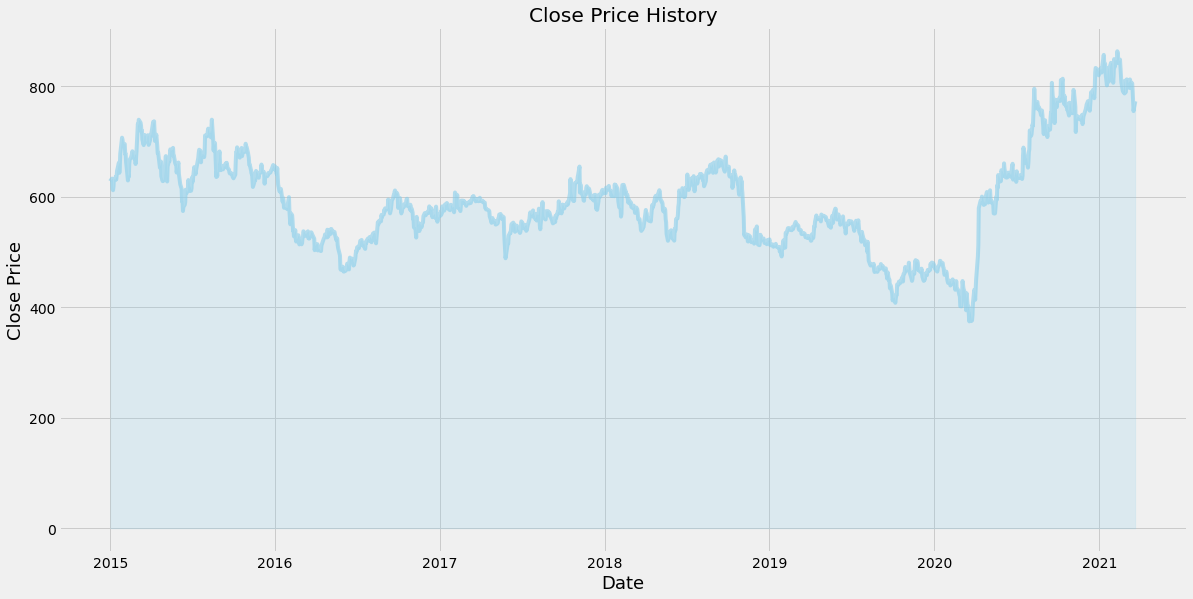

In [6]:
plt.figure(figsize = (18, 9))
plt.title('Close Price History')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.fill_between(df['Date'], df['Close'], color = "skyblue", alpha = 0.2)
plt.plot(df['Date'], df['Close'], color = "skyblue", alpha = 0.6)
plt.show()

In [7]:
# Create a new dataframe to store the close prices
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# divide the dataset into training data and testing data 
training_data_len = math.ceil(len(dataset)*0.75)

In [8]:
# Scale data to be values between 0 and 1
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
# Creating the training data set from scaled dataset
prediction_days = 30
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train
x_train = []
y_train = []
for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i - prediction_days:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))



In [10]:
# Build the model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dense(units = 25))
model.add(Dense(units = 1))

In [11]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
36/36 [==============================] - 5s 22ms/step - loss: 0.0326
Epoch 2/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0029
Epoch 3/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0017
Epoch 4/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0016
Epoch 5/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 6/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 7/100
36/36 [==============================] - 1s 22ms/step - loss: 0.0013
Epoch 8/100
36/36 [==============================] - 1s 21ms/step - loss: 0.0012
Epoch 9/100
36/36 [==============================] - 1s 24ms/step - loss: 0.0012
Epoch 10/100
36/36 [==============================] - 1s 33ms/step - loss: 0.0012
Epoch 11/100
36/36 [==============================] - 1s 39ms/step - loss: 0.0010
Epoch 12/100
36/36 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 13/100
36/36 [=====

In [13]:
# Save the model
model.save(symbol+'.model')

INFO:tensorflow:Assets written to: cipla.model\assets
INFO:tensorflow:Assets written to: cipla.model\assets


In [14]:
# Test Data set
test_data = scaled_data[training_data_len - prediction_days:, : ]
# Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i - prediction_days: i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)
# Reshape the data into the shape accepted by the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
# Getting the model's predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(len(predictions))
# Calculate RMSE Value
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print("RMSE:", rmse)

385
RMSE: 14.230746829797008


<ipython-input-16-89e04d980dce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


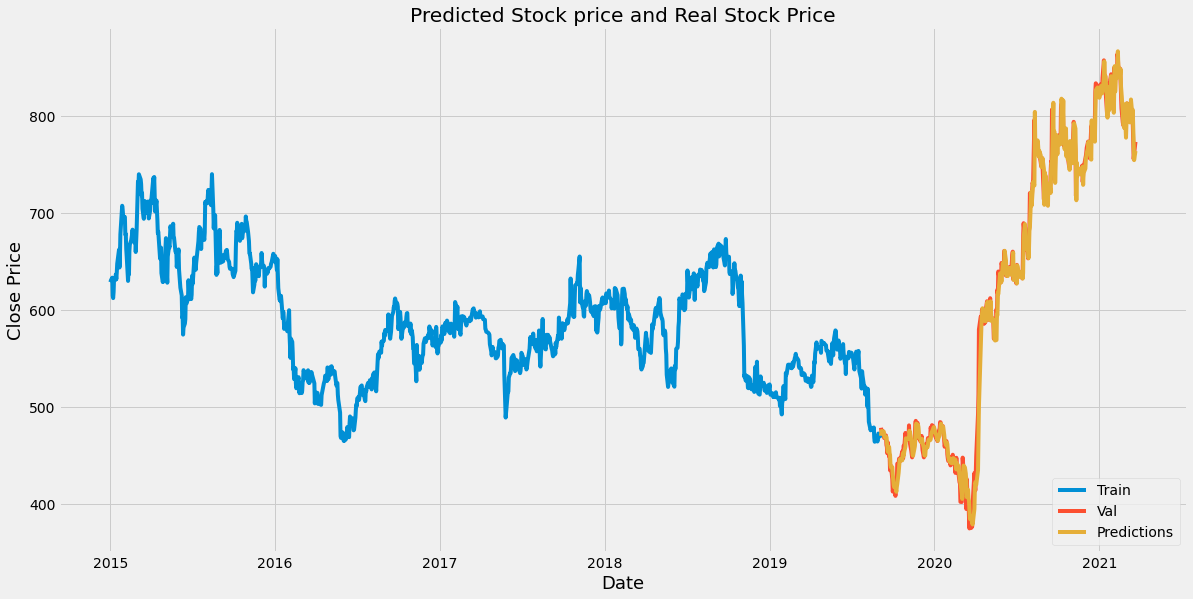

In [16]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize = (18, 9))
plt.title('Predicted Stock price and Real Stock Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [17]:
valid[-5:]

,Close,Predictions
Date,,
2021-03-16,792.30,805.906067
2021-03-17,772.15,788.096619
2021-03-18,755.15,769.664062
2021-03-19,760.65,754.074097
2021-03-22,772.85,763.469238


In [18]:
# Next Day Price Predcition 
newdf = df.filter(['Close'])


In [19]:

for i in range(5):
    last_30_days = newdf[-30:].values
    last_30_days_scaled = scaler.transform(last_30_days)
    print("last_30_days:\n")
    print(last_30_days)
    
    x_test = []
    x_test.append(last_30_days_scaled)
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    pred_price = model.predict(x_test)
    pred_price = scaler.inverse_transform(pred_price)
    
    print("Predicted Price:{}".format(pred_price))
    
    last_date = date.today()
    next_date = last_date + timedelta(days = i)
    
    newdf.loc[next_date, 'Close'] = pred_price
    # df2 = {'Close': pred_price} 
    # # pred_price = int(pred_price)
    # # newdf.append(pd.DataFrame(df, index=[last_date]))
    # print(newdf.tail(10))
print("next five day predictions are: {}".format(newdf[-5:]))

last_30_days:

[[847.25]
 [841.75]
 [863.4 ]
 [859.8 ]
 [848.55]
 [844.3 ]
 [848.35]
 [835.7 ]
 [825.45]
 [807.35]
 [792.45]
 [790.95]
 [789.05]
 [809.15]
 [787.05]
 [789.8 ]
 [811.8 ]
 [812.5 ]
 [806.75]
 [805.15]
 [809.25]
 [797.  ]
 [812.4 ]
 [805.95]
 [805.5 ]
 [792.3 ]
 [772.15]
 [755.15]
 [760.65]
 [772.85]]
Predicted Price:[[773.69696]]
last_30_days:

[[841.75      ]
 [863.4       ]
 [859.8       ]
 [848.55      ]
 [844.3       ]
 [848.35      ]
 [835.7       ]
 [825.45      ]
 [807.35      ]
 [792.45      ]
 [790.95      ]
 [789.05      ]
 [809.15      ]
 [787.05      ]
 [789.8       ]
 [811.8       ]
 [812.5       ]
 [806.75      ]
 [805.15      ]
 [809.25      ]
 [797.        ]
 [812.4       ]
 [805.95      ]
 [805.5       ]
 [792.3       ]
 [772.15      ]
 [755.15      ]
 [760.65      ]
 [772.85      ]
 [773.69696045]]
Predicted Price:[[771.4367]]
last_30_days:

[[863.4       ]
 [859.8       ]
 [848.55      ]
 [844.3       ]
 [848.35      ]
 [835.7       ]
 [825.45      ]
 [